# Project 1. 중고차 시세 예측
**과목명:  응용데이터애널리틱스 (Applied Data Analytics)** \\
**학수번호:  INE4108** \\
**교강사:  송재욱 교수 (산업공학과)** \\
 \\
***

##(Environmental Set-up & Data Loading)

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Google Drive where you have saved the unzipped
FOLDERNAME =  'ADX/'

assert FOLDERNAME is not None, 'ERROR'

%cd drive/My\ Drive
%cp -r $FOLDERNAME ../../

# 한글 나눔포트 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Mounted at /content/drive
/content/drive/My Drive
cp: cannot stat 'ADX/': No such file or directory
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (45.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open st

# #0. 데이터 가져오기 및 시각화(판단근거)

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/Shareddrives/응용데이터애널리틱스/해커톤1/P1_dataset.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

# 시스템 구현을 위한 Test Set 샘플
# df_test = pd.read_csv('/content/drive/Shareddrives/응용데이터애널리틱스/해커톤1/P1_testset_sample.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

# 모델 수립을 위한 Train/Validation Set

df

,GOODNO,SUCCYMD,CARNM,CHASNO,CARREGIYMD,YEAR,MISSNM,FUELNM,COLOR,EXHA,TRAVDIST,USEUSENM,OWNECLASNM,INNEEXPOCLASCD_YN,NEWCARPRIC,SUCCPRIC,YEARCHK,BONET,FRONT_LEFT_FENDER,FRONT_RIGHT_FENDER,FRONT_LEFT_DOOR,FRONT_RIGHT_DOOR,BACK_LEFT_DOOR,BACK_RIGHT_DOOR,TRUNK,FRONT_PANNEL,LEFT_STEP,RIGHT_STEP,LEFT_FILER_A,RIGHT_FILER_A,LEFT_FILER_B,RIGHT_FILER_B,LEFT_FILER_C,RIGHT_FILER_C,LEFT_REAR_FENDER,RIGHT_REAR_FENDER,BACK_PANEL1,LEFT_INSIDE_PANEL,RIGHT_INSIDE_PANEL,LEFT_WHEEL_HOUSE,...,LEFT_WHEEL_HOUSE_SHEETING,RIGHT_WHEEL_HOUSE_SHEETING,LEFT_REAR_INSIDE_PANEL_SHEETING,RIGHT_REAR_INSIDE_PANEL_SHEETING,LEFT_REAR_WHEEL_HOUSE_SHEETING,RIGHT_REAR_WHEEL_HOUSE_SHEETING,TRUNK_FLOOR_SHEETING,DASH_PANEL_SHEETING,SHEET_BACK_PANEL_SHEETING,SIDE_MEMBER_FRAME_SHEETING,FLOOR_PANEL_SHEETING,LEFT_SIDE_PANEL_SHEETING,RIGHT_SIDE_PANEL_SHEETING,FLOODING,TOTAL_LOSS,JOINCAR,NOTAVAILABLE,MF_KEY,MJ_MODEL_KEY,DT_MODEL_KEY,MJ_GRADE_KEY,DT_GRADE_KEY,NC_GRADE_KEY,SHIPPING_PRICE,NC_GRADE_PRICE,ABS,AB2,NAVIGATION,VDC,SMARTKEY,SUNLOOPPANORAMA,SUNLOOPCOMMON,SUNLOOPDUAL,DIS,TCS,AB1,ETC,AV,EPS,ECS
0,1512A2469,20160105,모닝 LPi LX 기본 블랙 프리미엄,KNABK518BBT020038,20100616.0,2011,A/T,LPG,C,1000,38480,자가,법인,X,10704916,4300000,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,46,28,158,18054,5192,11310000.0,9490000.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1512A2364,20160105,K3 1.6 가솔린(4도어) Nobless,KNAFZ412BDA040155,20130207.0,2013,A/T,가솔린,A,1600,62240,자가,법인,X,21230000,11650000,Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,37,295,1241,21541,13750,NaN,19750000.0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0
2,1512A2319,20160105,K3 1.6 가솔린(4도어) Trendy,KNAFK412BEA206484,20140128.0,2014,A/T,가솔린,A,1591,37926,자가,법인,X,18043152,12350000,Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,37,295,1241,21538,17225,19340000.0,18170000.0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0
3,1512A1643,20160105,K5 2.0LPI 렌터카 디럭스,KNAGN418BDA366086,20121218.0,2013,A/T,LPG,B,2000,110149,렌트,법인,X,17280000,5900000,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,38,166,5782,20503,10890,17680000.0,17680000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1512A1371,20160105,K5 2.0LPI 렌터카 스마트,KNAGN415BBA140279,20110428.0,2011,A/T,LPG,D,2000,81675,렌트,법인,X,15800000,4730000,Y,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,38,166,5782,20502,5405,15800000.0,15800000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36789,1905C0711,20190523,더뉴모닝 1.0가솔린 Deluxe,KNABE511BGT021147,20150216.0,2016,A/T,가솔린,A,998,62180,자가,법인상품,X,1,5910000,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,46,1053,10912,24318,21215,12500000.0,11150000.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
36790,1905C0899,20190523,더뉴K9 V6 3.8 EXECUTIVE(이그제큐티브),KNALT413BFS025606,20141218.0,2015,A/T,가솔린,D,3778,97801,자가,법인상품,X,1,19200000,N,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,40,1047,10874,24245,21071,56800000.0,56800000.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
36791,1905C0140,20190523,더뉴K9 V6 3.3 PRESTIGE(프레스티지),KNALT411BFS028524,20150506.0,2015,A/T,가솔린,B,3342,153601,렌트,법인상품,X,51780001,18200000,Y,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,40,1047,10873,24243,21069,49089202.0,49900000.0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
36792,1905C0350,20190523,더뉴K5 2.0 LPI 렌터카 디럭스,KNAGN418BFA544130,20140718.0,2015,A/T,LPG,A,1999,140058,렌트,법인상품,X,1,5800000,N,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,38,935,5789,23037,17401,17130000.0,17050000.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
## 시각화 ##
##
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


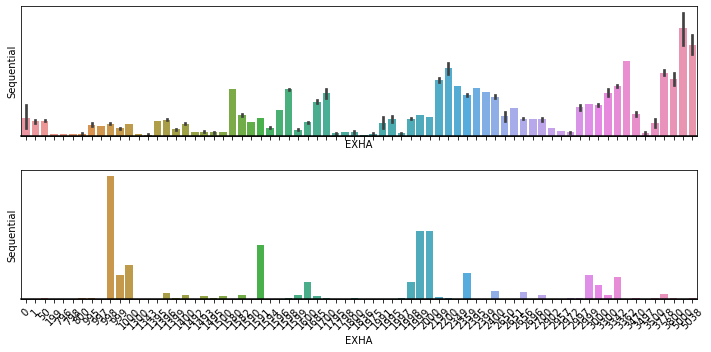

In [ ]:
# EXHA(배기량)의 경향성 확인

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

sns.barplot(x='EXHA', y='SUCCPRIC', data=df,ax=ax1)
ax1.axhline(0, color="k", clip_on=False) # 0 해당값에 선이 생김 / k는 black, r은 붉은색
ax1.set_ylabel("Sequential") # y축 이름 설정

sns.countplot(df['EXHA'],ax=ax2)
ax2.axhline(0, color="k", clip_on=False) # 0 해당값에 선이 생김 / k는 black, r은 붉은색
ax2.set_ylabel("Sequential") # y축 이름 설정

plt.xticks(rotation = 45 )
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

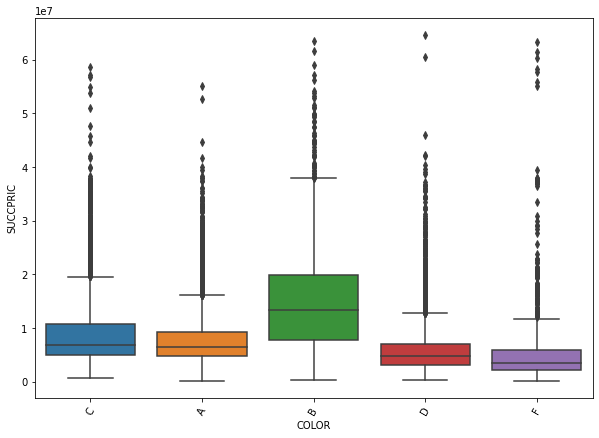

In [ ]:
# COLOR

# Color 5가지 색상 중 'B'의 SUCCPRIC분포가 확연히 구분되어 COLOR 변수를 B or not 으로 나눌 수 있다.
plt.figure(figsize=(10, 7))

sns.boxplot('COLOR', 'SUCCPRIC', data=df)
plt.rcParams["axes.labelsize"] = 5
plt.xticks(rotation = 60 )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

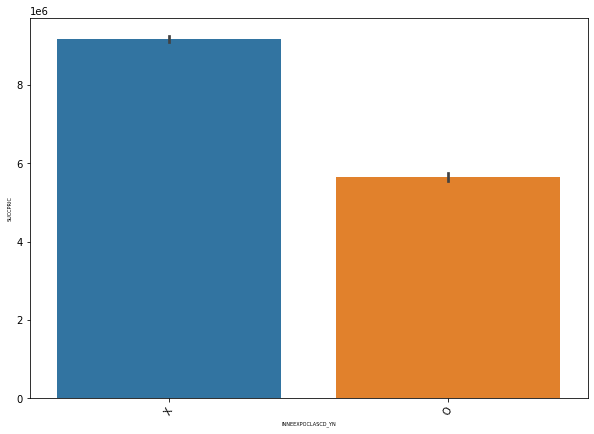

In [ ]:
#INNEEXPOCLASCD_YN(내수수출구분) : 내수수출 여부에 따라 구분됨

plt.figure(figsize=(10, 7))

sns.barplot('INNEEXPOCLASCD_YN', 'SUCCPRIC', data=df)
plt.rcParams["axes.labelsize"] = 5
plt.xticks(rotation = 60 )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

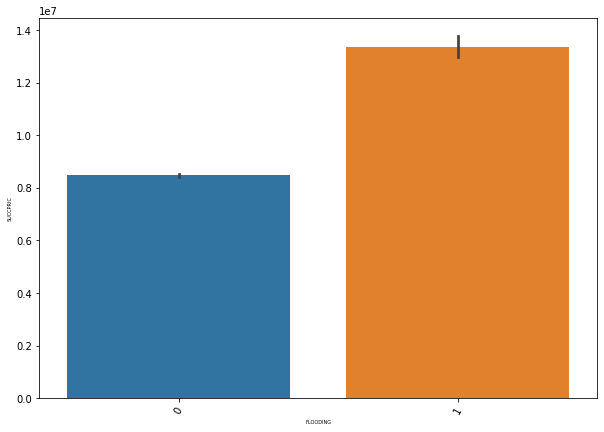

In [ ]:
#FLOODING(침수) 여부에 따른 구분
plt.figure(figsize=(10, 7))

sns.barplot('FLOODING', 'SUCCPRIC', data=df)
plt.rcParams["axes.labelsize"] = 5
plt.xticks(rotation = 60 )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

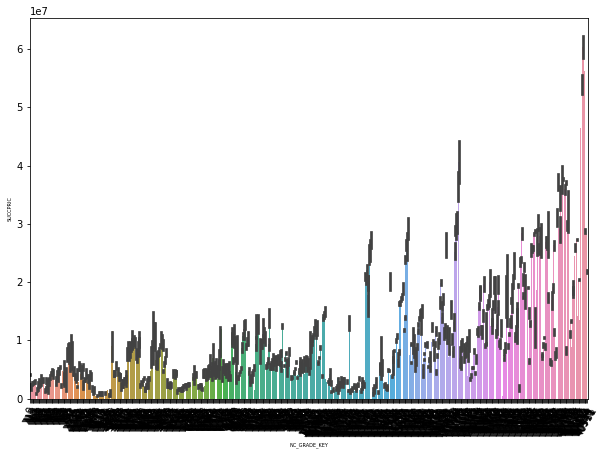

In [ ]:
# NC_GRADE_KEY(신차등급키),DT_GRADE_KEY(세부등급키),MJ_GRADE_KEY(모델등급키)가 높아질수록 SUCCPRIC 증가하는 경향성 확인

plt.figure(figsize=(10, 7))

sns.barplot('NC_GRADE_KEY', 'SUCCPRIC', data=df)
plt.rcParams["axes.labelsize"] = 5
plt.xticks(rotation = 60 )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

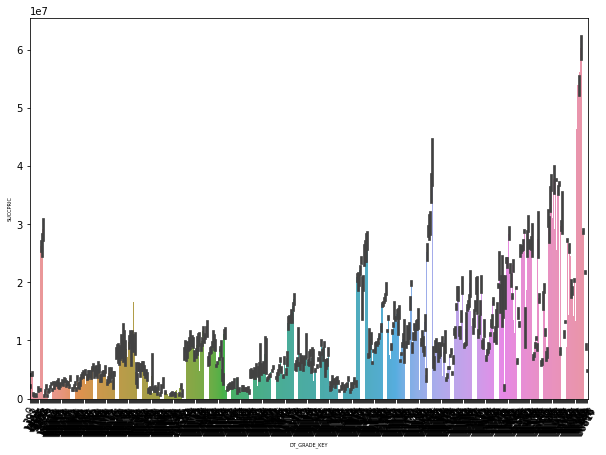

In [ ]:
plt.figure(figsize=(10, 7))

sns.barplot('DT_GRADE_KEY', 'SUCCPRIC', data=df)
plt.rcParams["axes.labelsize"] = 5
plt.xticks(rotation = 60 )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

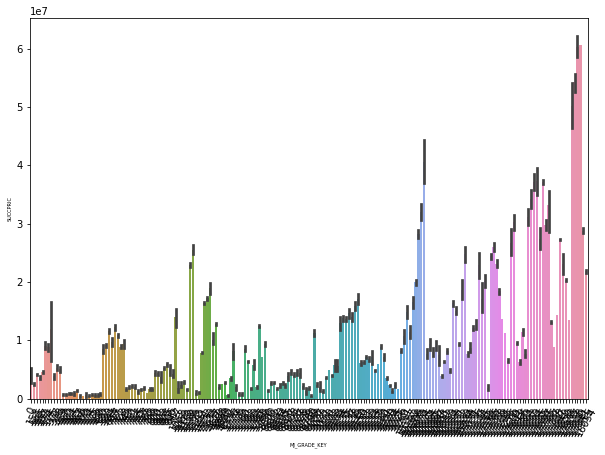

In [ ]:
plt.figure(figsize=(10, 7))

sns.barplot('MJ_GRADE_KEY', 'SUCCPRIC', data=df)
plt.rcParams["axes.labelsize"] = 5
plt.xticks(rotation = 60 )

# #1. 필요없는 열 제거하기

In [ ]:
## 필요없는 열 (총5개), 값이 하나만 있는 열 제거 (총 40개)=> (총 45개 제거)

COLUMNS = df.columns
useless = []
for i in COLUMNS:
  if df[i].nunique() == 1:
    useless.append(i)

#GOODNO,CARNM,CHASNO,YEAR,YEARCHK : 모델, 등급키에서 이에 대한 정보가 들어있다 판단하여 삭제


useless+=["GOODNO","CARNM","CHASNO","YEAR","YEARCHK"]

df=df.drop(useless,axis=1)
df

,SUCCYMD,CARREGIYMD,MISSNM,FUELNM,COLOR,EXHA,TRAVDIST,USEUSENM,OWNECLASNM,INNEEXPOCLASCD_YN,NEWCARPRIC,SUCCPRIC,BONET,FRONT_LEFT_FENDER,FRONT_RIGHT_DOOR,BACK_LEFT_DOOR,TRUNK,LEFT_STEP,RIGHT_FILER_C,RIGHT_REAR_FENDER,LEFT_INSIDE_PANEL,RIGHT_INSIDE_WHEEL_HOUSE,LEFT_REAR_WHEEL_HOUSE,RIGHT_REAR_WHEEL_HOUSE,TRUNK_FLOOR,SIDE_MEMBER_FRAME,FLOOR_PANEL,RIGHT_SIDE_PANEL,BACK_PANEL2,LEFT_INSIDE_SHEETING,RIGHT_WHEEL_HOUSE_SHEETING,LEFT_REAR_INSIDE_PANEL_SHEETING,LEFT_REAR_WHEEL_HOUSE_SHEETING,TRUNK_FLOOR_SHEETING,DASH_PANEL_SHEETING,SHEET_BACK_PANEL_SHEETING,SIDE_MEMBER_FRAME_SHEETING,FLOOR_PANEL_SHEETING,FLOODING,TOTAL_LOSS,MJ_MODEL_KEY,DT_MODEL_KEY,MJ_GRADE_KEY,DT_GRADE_KEY,NC_GRADE_KEY,SHIPPING_PRICE,NC_GRADE_PRICE,ABS,AB2,NAVIGATION,VDC,SMARTKEY,SUNLOOPPANORAMA,SUNLOOPCOMMON,DIS,TCS,AB1,AV,ECS
0,20160105,20100616.0,A/T,LPG,C,1000,38480,자가,법인,X,10704916,4300000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,28,158,18054,5192,11310000.0,9490000.0,0,0,0,0,0,0,0,0,0,1,0,0
1,20160105,20130207.0,A/T,가솔린,A,1600,62240,자가,법인,X,21230000,11650000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,295,1241,21541,13750,NaN,19750000.0,1,1,1,1,1,0,0,0,0,0,1,0
2,20160105,20140128.0,A/T,가솔린,A,1591,37926,자가,법인,X,18043152,12350000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,295,1241,21538,17225,19340000.0,18170000.0,1,1,1,1,1,0,0,0,0,0,1,0
3,20160105,20121218.0,A/T,LPG,B,2000,110149,렌트,법인,X,17280000,5900000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,166,5782,20503,10890,17680000.0,17680000.0,1,1,0,0,0,0,0,0,0,0,0,0
4,20160105,20110428.0,A/T,LPG,D,2000,81675,렌트,법인,X,15800000,4730000,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,38,166,5782,20502,5405,15800000.0,15800000.0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36789,20190523,20150216.0,A/T,가솔린,A,998,62180,자가,법인상품,X,1,5910000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,1053,10912,24318,21215,12500000.0,11150000.0,1,1,0,1,0,0,0,0,0,0,0,0
36790,20190523,20141218.0,A/T,가솔린,D,3778,97801,자가,법인상품,X,1,19200000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,40,1047,10874,24245,21071,56800000.0,56800000.0,1,1,1,1,1,0,0,0,0,0,0,0
36791,20190523,20150506.0,A/T,가솔린,B,3342,153601,렌트,법인상품,X,51780001,18200000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,1047,10873,24243,21069,49089202.0,49900000.0,1,1,1,1,1,0,1,0,0,0,0,0
36792,20190523,20140718.0,A/T,LPG,A,1999,140058,렌트,법인상품,X,1,5800000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,38,935,5789,23037,17401,17130000.0,17050000.0,1,1,0,0,1,0,0,0,0,0,0,0


# #2. 이상치 처리

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<Figure size 720x504 with 0 Axes>

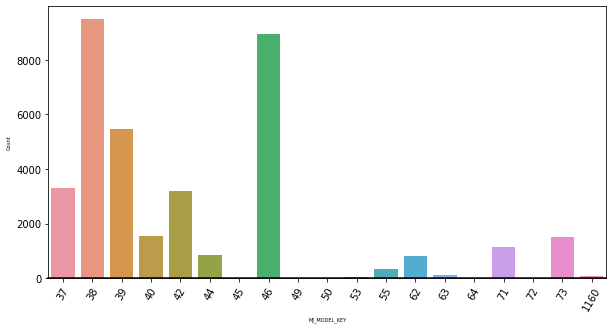

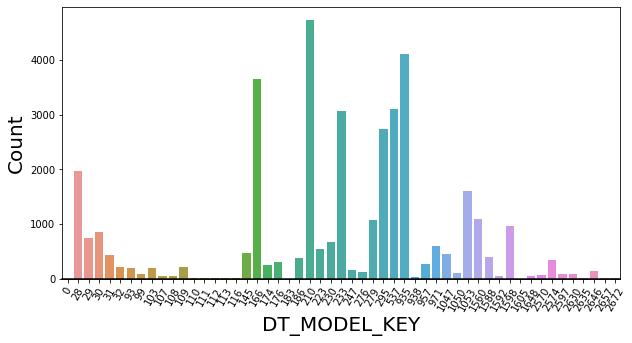

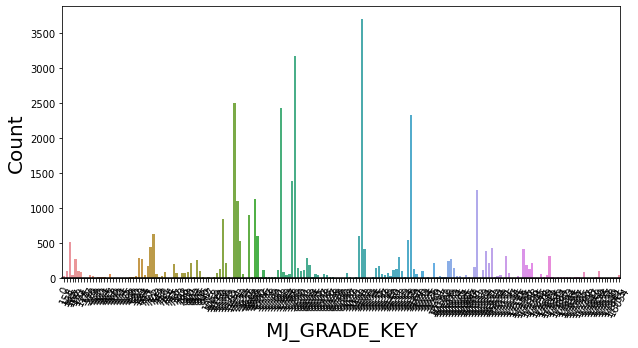

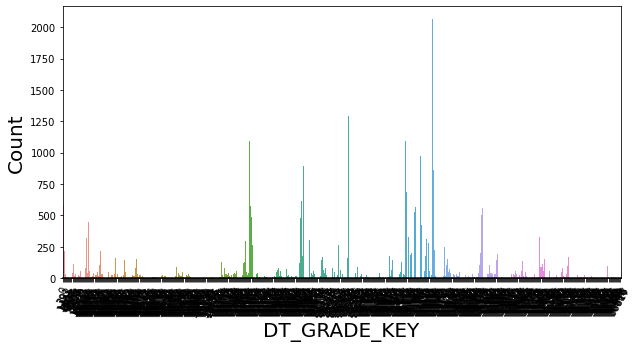

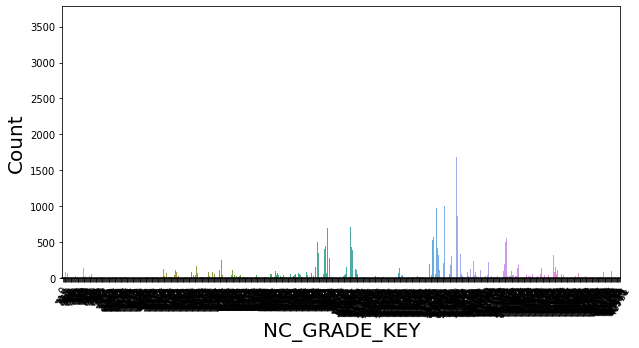

In [ ]:
plt.figure(figsize=(10, 7))

col = ['MJ_MODEL_KEY','DT_MODEL_KEY','MJ_GRADE_KEY','DT_GRADE_KEY','NC_GRADE_KEY']

for i in col:
   f, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
   sns.countplot(df[i])
   ax.axhline(0, color="k", clip_on=False) # 0 해당값에 선이 생김 / k는 black, r은 붉은색
   ax.set_ylabel("Count") # y축 이름 설정
   plt.rcParams["axes.labelsize"] = 20
   plt.xticks(rotation = 60 )



In [ ]:
## 0,1값만을 가지는 이산변수들이 아닌 변수들에 대하여 정상범위를 휴리스틱하게 설정하고, 그 밖에 있는 값들은 결측치로 간주.
df_temp=df.copy()

def cleaning(column,min,max,df):
  count=0
  for i in range(len(df)):
    if df[column].iloc[i]<min or max<df[column].iloc[i]:
      df[column].iloc[i]=None
      count=count+1
  print(column,count)
  return df

 
##해당 10개의 변수들에 대한 범위 외 변수들 nan값처리 
df_temp=cleaning('EXHA',50,5100,df_temp)
# df_temp=cleaning('TRAVDIST',0,9999999,df_temp)
df_temp=cleaning('NEWCARPRIC',800000,300000000,df_temp)

#모델과 등급 키에 0은 없어야 한다고 판단.
df_temp=cleaning('MJ_MODEL_KEY',10,100,df_temp)
df_temp=cleaning('DT_MODEL_KEY',20,2700,df_temp)
df_temp=cleaning('MJ_GRADE_KEY',150,18100,df_temp)
df_temp=cleaning('DT_GRADE_KEY',300,37000,df_temp)
df_temp=cleaning('NC_GRADE_KEY',700,41000,df_temp)
df_temp=cleaning('SHIPPING_PRICE',480000,300000000,df_temp)
df_temp=cleaning('NC_GRADE_PRICE',5000000,300000000,df_temp)
df=df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


EXHA 9
NEWCARPRIC 11346
MJ_MODEL_KEY 83
DT_MODEL_KEY 3
MJ_GRADE_KEY 33
DT_GRADE_KEY 584
NC_GRADE_KEY 3601
SHIPPING_PRICE 135
NC_GRADE_PRICE 0


# #3. 수치화 및 새로운 변수 생성

In [ ]:
## 4개의 Categorical Feature에 대하여 one hot encoding 적용

## 용도명 변수 결측치 323개 최빈값(렌트)으로 대체
most_freq = df['USEUSENM'].value_counts(dropna = True).idxmax()
print(most_freq)
df['USEUSENM'].fillna(most_freq,inplace = True)

## 적용할 변수 dropna
df = df.dropna(subset=["MISSNM"])
df = df.dropna(subset=["FUELNM"])
df = df.dropna(subset=["OWNECLASNM"])


columns = ["MISSNM","FUELNM1","USEUSENM","OWNECLASNM"]
onehot_data = pd.get_dummies(df[columns])
onehot_data.columns
df= pd.concat([df,onehot_data],axis=1)
df=df.drop(columns,axis=1)

렌트


In [ ]:
## INNEEXPOCLASCD_YN , COLOR 변수('B' 인지 아닌지) 수치화


df.loc[df.INNEEXPOCLASCD_YN == 'X', 'INNEEXPOCLASCD_YN'] = 1
df.loc[df.INNEEXPOCLASCD_YN == 'O', 'INNEEXPOCLASCD_YN'] = 0
df.loc[df.COLOR == 'B', 'color_BorElse'] = 1
df.loc[df.COLOR != 'B', 'color_BorElse'] = 0
df=df.drop('COLOR',axis=1)

df[['INNEEXPOCLASCD_YN']] = df[['INNEEXPOCLASCD_YN']].apply(pd.to_numeric)

df=df.reset_index()
df=df.drop('index',axis=1)

In [ ]:
## 출고가 합치는 작업 ## Shipping Price > Nc grade price > Newcarprice 순으로
## Shipping인지 grade인지 newcar인지를 파악할 수 있게 하기 위해 새로운 feature 두개 (is_shipping_price, is_grade_price)를 만듦

shipping_price_new=[]
is_shipping_price=[]
is_grade_price=[]

isnan_shipping=pd.isna(df['SHIPPING_PRICE'])
isnan_grade=pd.isna(df['NC_GRADE_PRICE'])
for i in range(len(df)):
  is_shipping=0
  is_grade=0
  if isnan_shipping[i]==True:
    if isnan_grade[i]==True:
      val=df['NEWCARPRIC'][i]
    else:
      val=df['NC_GRADE_PRICE'][i]
      is_grade=1
  else:
    val=df['SHIPPING_PRICE'][i]
    is_shipping=1
  shipping_price_new+=[val]
  is_shipping_price+=[is_shipping]
  is_grade_price+=[is_grade]

df.insert(0,"IS_GRADE_PRICE",is_grade_price)
df.insert(0,"IS_SHIPPING_PRICE",is_shipping_price)
df.insert(0,"SHIPPING_PRICE(MERGED)",shipping_price_new)
df=df.drop('SHIPPING_PRICE',axis=1)
df=df.drop('NEWCARPRIC',axis=1)
df=df.drop('NC_GRADE_PRICE',axis=1)

In [ ]:
## USED_DATE(사용일수) 변수만들기

from datetime import datetime
import math
df1=df.copy()

df1 = df1.dropna(subset=["CARREGIYMD"]) ## 결측치 1개이므로 제거
df1 = df1.dropna(subset=["SUCCYMD"]) ## 결측치 0개이므로 제거

used_day=[]

for i in range(len(df1)):
  # print(i)
  carregiymd=datetime.strptime(str(int(df1['CARREGIYMD'].iloc[i])), "%Y%m%d")
  succymd=datetime.strptime(str(int(df1['SUCCYMD'].iloc[i])), "%Y%m%d")
  used_day+=[(succymd-carregiymd).days]


df1.insert(0,"USED_DATE",used_day)
df1=df1.drop('CARREGIYMD',axis=1)
df1=df1.drop('SUCCYMD',axis=1)

In [ ]:
df1

,USED_DATE,EXHA,TRAVDIST,INNEEXPOCLASCD_YN,NEWCARPRIC,SUCCPRIC,BONET,FRONT_LEFT_FENDER,FRONT_RIGHT_DOOR,BACK_LEFT_DOOR,TRUNK,LEFT_STEP,RIGHT_FILER_C,RIGHT_REAR_FENDER,LEFT_INSIDE_PANEL,RIGHT_INSIDE_WHEEL_HOUSE,LEFT_REAR_WHEEL_HOUSE,RIGHT_REAR_WHEEL_HOUSE,TRUNK_FLOOR,SIDE_MEMBER_FRAME,FLOOR_PANEL,RIGHT_SIDE_PANEL,BACK_PANEL2,LEFT_INSIDE_SHEETING,RIGHT_WHEEL_HOUSE_SHEETING,LEFT_REAR_INSIDE_PANEL_SHEETING,LEFT_REAR_WHEEL_HOUSE_SHEETING,TRUNK_FLOOR_SHEETING,DASH_PANEL_SHEETING,SHEET_BACK_PANEL_SHEETING,SIDE_MEMBER_FRAME_SHEETING,FLOOR_PANEL_SHEETING,FLOODING,TOTAL_LOSS,MJ_MODEL_KEY,DT_MODEL_KEY,MJ_GRADE_KEY,DT_GRADE_KEY,NC_GRADE_KEY,SHIPPING_PRICE,NC_GRADE_PRICE,ABS,AB2,NAVIGATION,VDC,SMARTKEY,SUNLOOPPANORAMA,SUNLOOPCOMMON,DIS,TCS,AB1,AV,ECS,MISSNM_A/T,MISSNM_CVT,MISSNM_M/T,FUELNM_Hybrid,FUELNM_LPG,FUELNM_가솔린,FUELNM_겸용,FUELNM_디젤,FUELNM_전기,USEUSENM_렌트,USEUSENM_리스,USEUSENM_사업,USEUSENM_업무,USEUSENM_자가,OWNECLASNM_개인,OWNECLASNM_개인사업,OWNECLASNM_법인,OWNECLASNM_법인상품,OWNECLASNM_상품용,OWNECLASNM_재외국인,OWNECLASNM_종교단체,color_BorElse
0,2029,1000,38480,1,10704916,4300000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,28,158,18054,5192,11310000.0,9490000.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.0
1,1062,1600,62240,1,21230000,11650000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,295,1241,21541,13750,NaN,19750000.0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.0
2,707,1591,37926,1,18043152,12350000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,295,1241,21538,17225,19340000.0,18170000.0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.0
3,1113,2000,110149,1,17280000,5900000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,166,5782,20503,10890,17680000.0,17680000.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0
4,1713,2000,81675,1,15800000,4730000,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,38,166,5782,20502,5405,15800000.0,15800000.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36775,1557,998,62180,1,1,5910000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,1053,10912,24318,21215,12500000.0,11150000.0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.0
36776,1617,3778,97801,1,1,19200000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,40,1047,10874,24245,21071,56800000.0,56800000.0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.0
36777,1478,3342,153601,1,51780001,18200000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,1047,10873,24243,21069,49089202.0,49900000.0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.0
36778,1770,1999,140058,1,1,5800000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,38,935,5789,23037,17401,17130000.0,17050000.0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0


In [ ]:
## 예측치 만 단위 사용

df1["SUCCPRIC"]=df1["SUCCPRIC"]/10000

In [ ]:
df1

,USED_DATE,EXHA,TRAVDIST,INNEEXPOCLASCD_YN,NEWCARPRIC,SUCCPRIC,BONET,FRONT_LEFT_FENDER,FRONT_RIGHT_DOOR,BACK_LEFT_DOOR,TRUNK,LEFT_STEP,RIGHT_FILER_C,RIGHT_REAR_FENDER,LEFT_INSIDE_PANEL,RIGHT_INSIDE_WHEEL_HOUSE,LEFT_REAR_WHEEL_HOUSE,RIGHT_REAR_WHEEL_HOUSE,TRUNK_FLOOR,SIDE_MEMBER_FRAME,FLOOR_PANEL,RIGHT_SIDE_PANEL,BACK_PANEL2,LEFT_INSIDE_SHEETING,RIGHT_WHEEL_HOUSE_SHEETING,LEFT_REAR_INSIDE_PANEL_SHEETING,LEFT_REAR_WHEEL_HOUSE_SHEETING,TRUNK_FLOOR_SHEETING,DASH_PANEL_SHEETING,SHEET_BACK_PANEL_SHEETING,SIDE_MEMBER_FRAME_SHEETING,FLOOR_PANEL_SHEETING,FLOODING,TOTAL_LOSS,MJ_MODEL_KEY,DT_MODEL_KEY,MJ_GRADE_KEY,DT_GRADE_KEY,NC_GRADE_KEY,SHIPPING_PRICE,NC_GRADE_PRICE,ABS,AB2,NAVIGATION,VDC,SMARTKEY,SUNLOOPPANORAMA,SUNLOOPCOMMON,DIS,TCS,AB1,AV,ECS,MISSNM_A/T,MISSNM_CVT,MISSNM_M/T,FUELNM_Hybrid,FUELNM_LPG,FUELNM_가솔린,FUELNM_겸용,FUELNM_디젤,FUELNM_전기,USEUSENM_렌트,USEUSENM_리스,USEUSENM_사업,USEUSENM_업무,USEUSENM_자가,OWNECLASNM_개인,OWNECLASNM_개인사업,OWNECLASNM_법인,OWNECLASNM_법인상품,OWNECLASNM_상품용,OWNECLASNM_재외국인,OWNECLASNM_종교단체,color_BorElse
0,2029,1000,38480,1,10704916,430.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,28,158,18054,5192,11310000.0,9490000.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.0
1,1062,1600,62240,1,21230000,1165.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,295,1241,21541,13750,NaN,19750000.0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.0
2,707,1591,37926,1,18043152,1235.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,295,1241,21538,17225,19340000.0,18170000.0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.0
3,1113,2000,110149,1,17280000,590.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,166,5782,20503,10890,17680000.0,17680000.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0
4,1713,2000,81675,1,15800000,473.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,38,166,5782,20502,5405,15800000.0,15800000.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36775,1557,998,62180,1,1,591.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,1053,10912,24318,21215,12500000.0,11150000.0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.0
36776,1617,3778,97801,1,1,1920.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,40,1047,10874,24245,21071,56800000.0,56800000.0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.0
36777,1478,3342,153601,1,51780001,1820.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,1047,10873,24243,21069,49089202.0,49900000.0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.0
36778,1770,1999,140058,1,1,580.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,38,935,5789,23037,17401,17130000.0,17050000.0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0


# #4. 결측치 및 이상치 처리&대체

In [ ]:
!pip install missingpy

     |████████████████████████████████| 49 kB 4.0 MB/s 


In [ ]:
#아직 NaN값이 존재하는 column들
for i in df1.columns:
  if df1[i].isnull().sum() != 0:
    
    print(i)
    print(df1[i].isnull().sum())

SHIPPING_PRICE
4323
NC_GRADE_PRICE
3778


In [ ]:
y_temp = df1['SUCCPRIC']

In [ ]:
##MissingForest 사용하여 나머지 결측&이상치 대체
from missingpy import MissForest

# Make an instance and perform the imputation
imputer = MissForest()
df_temp1 = df1.drop('SUCCPRIC',axis=1)  # target값 제거 후 예측. 후에 validation parting 나눌 때 필요하므로 다시 concat 할 예정
imputer.fit(df_temp1)  # fit처리를 저장 하여, 후에 test데이터에 transform 해주기 위함. imputer.transform(df_test)하면 가능
X_imputer = imputer.transform(df_temp1)
X_imputer = pd.DataFrame(X_imputer, columns=df_temp1.columns.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


In [ ]:
X_imputer.isnull().sum().sum()

0

In [ ]:
X_imputer.reset_index().drop('index', axis = 1)

,USED_DATE,EXHA,TRAVDIST,INNEEXPOCLASCD_YN,NEWCARPRIC,BONET,FRONT_LEFT_FENDER,FRONT_RIGHT_DOOR,BACK_LEFT_DOOR,TRUNK,LEFT_STEP,RIGHT_FILER_C,RIGHT_REAR_FENDER,LEFT_INSIDE_PANEL,RIGHT_INSIDE_WHEEL_HOUSE,LEFT_REAR_WHEEL_HOUSE,RIGHT_REAR_WHEEL_HOUSE,TRUNK_FLOOR,SIDE_MEMBER_FRAME,FLOOR_PANEL,RIGHT_SIDE_PANEL,BACK_PANEL2,LEFT_INSIDE_SHEETING,RIGHT_WHEEL_HOUSE_SHEETING,LEFT_REAR_INSIDE_PANEL_SHEETING,LEFT_REAR_WHEEL_HOUSE_SHEETING,TRUNK_FLOOR_SHEETING,DASH_PANEL_SHEETING,SHEET_BACK_PANEL_SHEETING,SIDE_MEMBER_FRAME_SHEETING,FLOOR_PANEL_SHEETING,FLOODING,TOTAL_LOSS,MJ_MODEL_KEY,DT_MODEL_KEY,MJ_GRADE_KEY,DT_GRADE_KEY,NC_GRADE_KEY,SHIPPING_PRICE,NC_GRADE_PRICE,ABS,AB2,NAVIGATION,VDC,SMARTKEY,SUNLOOPPANORAMA,SUNLOOPCOMMON,DIS,TCS,AB1,AV,ECS,MISSNM_A/T,MISSNM_CVT,MISSNM_M/T,FUELNM_Hybrid,FUELNM_LPG,FUELNM_가솔린,FUELNM_겸용,FUELNM_디젤,FUELNM_전기,USEUSENM_렌트,USEUSENM_리스,USEUSENM_사업,USEUSENM_업무,USEUSENM_자가,OWNECLASNM_개인,OWNECLASNM_개인사업,OWNECLASNM_법인,OWNECLASNM_법인상품,OWNECLASNM_상품용,OWNECLASNM_재외국인,OWNECLASNM_종교단체,color_BorElse
0,2029.0,1000.0,38480.0,1.0,10704916.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,28.0,158.0,18054.0,5192.0,11310000.0,9490000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1062.0,1600.0,62240.0,1.0,21230000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,295.0,1241.0,21541.0,13750.0,21892700.0,19750000.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,707.0,1591.0,37926.0,1.0,18043152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,295.0,1241.0,21538.0,17225.0,19340000.0,18170000.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1113.0,2000.0,110149.0,1.0,17280000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,166.0,5782.0,20503.0,10890.0,17680000.0,17680000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1713.0,2000.0,81675.0,1.0,15800000.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,38.0,166.0,5782.0,20502.0,5405.0,15800000.0,15800000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36774,1557.0,998.0,62180.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,1053.0,10912.0,24318.0,21215.0,12500000.0,11150000.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36775,1617.0,3778.0,97801.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,1047.0,10874.0,24245.0,21071.0,56800000.0,56800000.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36776,1478.0,3342.0,153601.0,1.0,51780001.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1047.0,10873.0,24243.0,21069.0,49089202.0,49900000.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.

In [ ]:
##df_temp1 과 df1['SUCCPRIC'] concat -> 다시 원래 데이터 모형으로
y_temp = df1['SUCCPRIC']
y_temp = pd.DataFrame(y_temp).reset_index().drop('index', axis = 1)
X_MF = pd.concat([X_imputer,y_temp], axis = 1)

##test에 적용!!!

In [ ]:
X_MF

,USED_DATE,EXHA,TRAVDIST,INNEEXPOCLASCD_YN,NEWCARPRIC,BONET,FRONT_LEFT_FENDER,FRONT_RIGHT_DOOR,BACK_LEFT_DOOR,TRUNK,LEFT_STEP,RIGHT_FILER_C,RIGHT_REAR_FENDER,LEFT_INSIDE_PANEL,RIGHT_INSIDE_WHEEL_HOUSE,LEFT_REAR_WHEEL_HOUSE,RIGHT_REAR_WHEEL_HOUSE,TRUNK_FLOOR,SIDE_MEMBER_FRAME,FLOOR_PANEL,RIGHT_SIDE_PANEL,BACK_PANEL2,LEFT_INSIDE_SHEETING,RIGHT_WHEEL_HOUSE_SHEETING,LEFT_REAR_INSIDE_PANEL_SHEETING,LEFT_REAR_WHEEL_HOUSE_SHEETING,TRUNK_FLOOR_SHEETING,DASH_PANEL_SHEETING,SHEET_BACK_PANEL_SHEETING,SIDE_MEMBER_FRAME_SHEETING,FLOOR_PANEL_SHEETING,FLOODING,TOTAL_LOSS,MJ_MODEL_KEY,DT_MODEL_KEY,MJ_GRADE_KEY,DT_GRADE_KEY,NC_GRADE_KEY,SHIPPING_PRICE,NC_GRADE_PRICE,ABS,AB2,NAVIGATION,VDC,SMARTKEY,SUNLOOPPANORAMA,SUNLOOPCOMMON,DIS,TCS,AB1,AV,ECS,MISSNM_A/T,MISSNM_CVT,MISSNM_M/T,FUELNM_Hybrid,FUELNM_LPG,FUELNM_가솔린,FUELNM_겸용,FUELNM_디젤,FUELNM_전기,USEUSENM_렌트,USEUSENM_리스,USEUSENM_사업,USEUSENM_업무,USEUSENM_자가,OWNECLASNM_개인,OWNECLASNM_개인사업,OWNECLASNM_법인,OWNECLASNM_법인상품,OWNECLASNM_상품용,OWNECLASNM_재외국인,OWNECLASNM_종교단체,color_BorElse,SUCCPRIC
0,2029.0,1000.0,38480.0,1.0,10704916.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,28.0,158.0,18054.0,5192.0,11310000.0,9490000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,430.0
1,1062.0,1600.0,62240.0,1.0,21230000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,295.0,1241.0,21541.0,13750.0,21892700.0,19750000.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1165.0
2,707.0,1591.0,37926.0,1.0,18043152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,295.0,1241.0,21538.0,17225.0,19340000.0,18170000.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1235.0
3,1113.0,2000.0,110149.0,1.0,17280000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,166.0,5782.0,20503.0,10890.0,17680000.0,17680000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,590.0
4,1713.0,2000.0,81675.0,1.0,15800000.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,38.0,166.0,5782.0,20502.0,5405.0,15800000.0,15800000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,473.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36774,1557.0,998.0,62180.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,1053.0,10912.0,24318.0,21215.0,12500000.0,11150000.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,591.0
36775,1617.0,3778.0,97801.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,1047.0,10874.0,24245.0,21071.0,56800000.0,56800000.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1920.0
36776,1478.0,3342.0,153601.0,1.0,51780001.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1047.0,10873.0,24243.0,21069.0,49089202.0,49900000.0,1.0,1.0,1.0,1.0,

In [ ]:
X_MF

,USED_DATE,EXHA,TRAVDIST,INNEEXPOCLASCD_YN,NEWCARPRIC,BONET,FRONT_LEFT_FENDER,FRONT_RIGHT_DOOR,BACK_LEFT_DOOR,TRUNK,LEFT_STEP,RIGHT_FILER_C,RIGHT_REAR_FENDER,LEFT_INSIDE_PANEL,RIGHT_INSIDE_WHEEL_HOUSE,LEFT_REAR_WHEEL_HOUSE,RIGHT_REAR_WHEEL_HOUSE,TRUNK_FLOOR,SIDE_MEMBER_FRAME,FLOOR_PANEL,RIGHT_SIDE_PANEL,BACK_PANEL2,LEFT_INSIDE_SHEETING,RIGHT_WHEEL_HOUSE_SHEETING,LEFT_REAR_INSIDE_PANEL_SHEETING,LEFT_REAR_WHEEL_HOUSE_SHEETING,TRUNK_FLOOR_SHEETING,DASH_PANEL_SHEETING,SHEET_BACK_PANEL_SHEETING,SIDE_MEMBER_FRAME_SHEETING,FLOOR_PANEL_SHEETING,FLOODING,TOTAL_LOSS,MJ_MODEL_KEY,DT_MODEL_KEY,MJ_GRADE_KEY,DT_GRADE_KEY,NC_GRADE_KEY,SHIPPING_PRICE,NC_GRADE_PRICE,ABS,AB2,NAVIGATION,VDC,SMARTKEY,SUNLOOPPANORAMA,SUNLOOPCOMMON,DIS,TCS,AB1,AV,ECS,MISSNM_A/T,MISSNM_CVT,MISSNM_M/T,FUELNM_Hybrid,FUELNM_LPG,FUELNM_가솔린,FUELNM_겸용,FUELNM_디젤,FUELNM_전기,USEUSENM_렌트,USEUSENM_리스,USEUSENM_사업,USEUSENM_업무,USEUSENM_자가,OWNECLASNM_개인,OWNECLASNM_개인사업,OWNECLASNM_법인,OWNECLASNM_법인상품,OWNECLASNM_상품용,OWNECLASNM_재외국인,OWNECLASNM_종교단체,color_BorElse,SUCCPRIC
0,2029.0,1000.0,38480.0,1.0,10704916.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,28.0,158.0,18054.0,5192.0,11310000.0,9490000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,430.0
1,1062.0,1600.0,62240.0,1.0,21230000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,295.0,1241.0,21541.0,13750.0,21892700.0,19750000.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1165.0
2,707.0,1591.0,37926.0,1.0,18043152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,295.0,1241.0,21538.0,17225.0,19340000.0,18170000.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1235.0
3,1113.0,2000.0,110149.0,1.0,17280000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,166.0,5782.0,20503.0,10890.0,17680000.0,17680000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,590.0
4,1713.0,2000.0,81675.0,1.0,15800000.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,38.0,166.0,5782.0,20502.0,5405.0,15800000.0,15800000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,473.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36774,1557.0,998.0,62180.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,1053.0,10912.0,24318.0,21215.0,12500000.0,11150000.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,591.0
36775,1617.0,3778.0,97801.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,1047.0,10874.0,24245.0,21071.0,56800000.0,56800000.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1920.0
36776,1478.0,3342.0,153601.0,1.0,51780001.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1047.0,10873.0,24243.0,21069.0,49089202.0,49900000.0,1.0,1.0,1.0,1.0,

# #5. 스케일링


In [ ]:
## Train, Validation, Target 분리
def splitData(df, ratio, y_column):
    
    columns_ = df.columns
    # Subsample the data
    mask = list(range(0,df.shape[0], ratio))
    X_val = df.iloc[mask, :].drop(y_column, 1)
    y_val = df.iloc[mask][y_column]
    
    mask = ~df.index.isin(mask)
    X_train = df.loc[mask, :].drop(y_column, 1)
    y_train = df.loc[mask, y_column]
    
    return X_train, y_train, X_val, y_val

# train set, validation set split 
# train set, validation set = 4 : 1

df2=X_MF.copy()
X_train, y_train, X_val, y_val = splitData(df2, 5, y_column = 'SUCCPRIC')

In [ ]:
## 스케일링 함수
def z_normalize (train, list): # 대상이 될 dataset과 feature list를 받으면 normalization 해주는 함수. 이때 사용된 평균과 표준편차를 함께 return한다.
  data=train.loc[:, list]
  mean=data.mean()  # mean값 저장
  std=data.std()    # standard deviation 저장
  data=(data-mean)/std  # normalization
  return data, [mean,std]

def z_normalize_val (val, list, cache): # train set normalization에서 사용된 식을 그대로 적용해주는 함수. cache=[mean,std]
  data=val.loc[:, list]
  mean=cache[0]
  std=cache[1]
  data=(data-mean)/std
  return data

In [ ]:
## 평균이 1보다 큰 열에 대하여 스케일링 적용

pick=[]
for i in range(len(X_train.mean())):
  if X_train.mean()[i]>1:
    pick+=[X_train.columns[i]]


X_train.loc[:, pick], cache = z_normalize(X_train, pick)
X_val.loc[:, pick] = z_normalize_val(X_val, pick, cache)

# #6. Modelling
- df를 사용하여 예측모형 수립
- 상세 사항은 업로드 된 비디오 참고

In [ ]:
##feature importance를 뽑기위해 1차적으로 RF training

from sklearn.ensemble import RandomForestRegressor
best_rf = None # store the best model into this 
best_mse = 1e10
best_mape = 1e10
best_hyperparameter1 = None
best_hyperparameter2 = None
results = {}
n_estimators = [400]
max_depths = [100]

X__ = X_train
X__val = X_val
for max_dep in max_depths:
  for n_e in n_estimators:
    rf_clf = RandomForestRegressor(max_depth=max_dep, n_estimators=n_e,random_state = 156)
    rf_clf.fit(X__, y_train)
    y_pred= rf_clf.predict(X__val)
    mse= np.mean(np.square(y_val - y_pred))
    mape=np.mean(np.abs(y_val - y_pred)/y_val)
    if mse < best_mse:
      best_mse=mse
      best_hyperparameter1=max_dep
      best_hyperparameter2=n_e
      best_rf = rf_clf
      best_mape=mape
      y_pred = best_rf.predict(X__val)

print('mse값:',best_mse)
print('mape값:',best_mape)
print("max_deps:",best_hyperparameter1)
print("n_estimators:",best_hyperparameter2)
print(best_rf)


mse값: 7538.6611929530245
mape값: 0.0860753459115766
max_deps: 100
n_estimators: 400
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=156, verbose=0, warm_start=False)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_

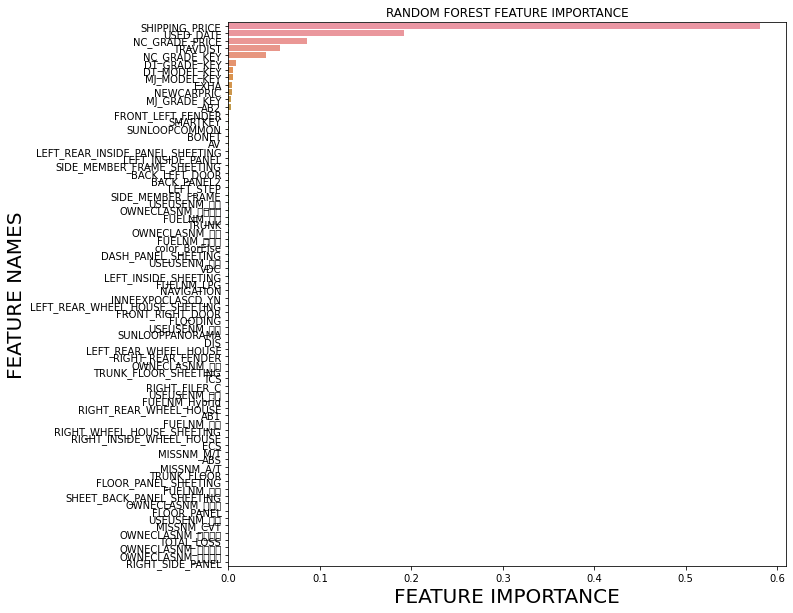

In [ ]:
## Feature importance 시각화
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance_, features_,model_type):
      dict_ = {'feature importance' : importance_, 'features' : features_}
      df = pd.DataFrame(dict_)
      df.sort_values(by=['feature importance'], ascending=False,inplace=True)
      plt.figure(figsize=(10,10))
      sns.barplot(x=df['feature importance'], y=df['features'])
      plt.title(model_type + 'FEATURE IMPORTANCE')
      plt.xlabel('FEATURE IMPORTANCE')
      plt.ylabel('FEATURE NAMES')

      
plot_feature_importance(best_rf.feature_importances_, X_val.columns, 'RANDOM FOREST ')

In [ ]:
X_train.columns

Index(['USED_DATE', 'EXHA', 'TRAVDIST', 'INNEEXPOCLASCD_YN', 'NEWCARPRIC',
       'BONET', 'FRONT_LEFT_FENDER', 'FRONT_RIGHT_DOOR', 'BACK_LEFT_DOOR',
       'TRUNK', 'LEFT_STEP', 'RIGHT_FILER_C', 'RIGHT_REAR_FENDER',
       'LEFT_INSIDE_PANEL', 'RIGHT_INSIDE_WHEEL_HOUSE',
       'LEFT_REAR_WHEEL_HOUSE', 'RIGHT_REAR_WHEEL_HOUSE', 'TRUNK_FLOOR',
       'SIDE_MEMBER_FRAME', 'FLOOR_PANEL', 'RIGHT_SIDE_PANEL', 'BACK_PANEL2',
       'LEFT_INSIDE_SHEETING', 'RIGHT_WHEEL_HOUSE_SHEETING',
       'LEFT_REAR_INSIDE_PANEL_SHEETING', 'LEFT_REAR_WHEEL_HOUSE_SHEETING',
       'TRUNK_FLOOR_SHEETING', 'DASH_PANEL_SHEETING',
       'SHEET_BACK_PANEL_SHEETING', 'SIDE_MEMBER_FRAME_SHEETING',
       'FLOOR_PANEL_SHEETING', 'FLOODING', 'TOTAL_LOSS', 'MJ_MODEL_KEY',
       'DT_MODEL_KEY', 'MJ_GRADE_KEY', 'DT_GRADE_KEY', 'NC_GRADE_KEY',
       'SHIPPING_PRICE', 'NC_GRADE_PRICE', 'ABS', 'AB2', 'NAVIGATION', 'VDC',
       'SMARTKEY', 'SUNLOOPPANORAMA', 'SUNLOOPCOMMON', 'DIS', 'TCS', 'AB1',
       'AV', 'ECS', '

In [ ]:
##RF 모델의 Feature importance 수치 print

importance=[]
c=X_train.columns
a=best_rf.feature_importances_
for i in range(len(a)):
  importance+=[[a[i],c[i]]]
importance.sort(reverse=True)
importance

[[0.580824354855247, 'SHIPPING_PRICE'],
 [0.19176728032370377, 'USED_DATE'],
 [0.08648658450996245, 'NC_GRADE_PRICE'],
 [0.05595767217272379, 'TRAVDIST'],
 [0.041535453116150645, 'NC_GRADE_KEY'],
 [0.008097096042626987, 'DT_GRADE_KEY'],
 [0.004675860931460454, 'DT_MODEL_KEY'],
 [0.004616343408552897, 'MJ_MODEL_KEY'],
 [0.004171493394642287, 'EXHA'],
 [0.0038263854314758853, 'NEWCARPRIC'],
 [0.0032967255381712445, 'MJ_GRADE_KEY'],
 [0.002595978855530301, 'AB2'],
 [0.0009228530165714681, 'FRONT_LEFT_FENDER'],
 [0.0007973872723208625, 'SMARTKEY'],
 [0.0007778764504804603, 'SUNLOOPCOMMON'],
 [0.0007166413999643716, 'BONET'],
 [0.0006069559521150547, 'AV'],
 [0.0004899598828888215, 'LEFT_REAR_INSIDE_PANEL_SHEETING'],
 [0.0004161853763227035, 'LEFT_INSIDE_PANEL'],
 [0.0004102401938781807, 'SIDE_MEMBER_FRAME_SHEETING'],
 [0.0003964107237736725, 'BACK_LEFT_DOOR'],
 [0.000384758428035106, 'BACK_PANEL2'],
 [0.00036030464900997856, 'LEFT_STEP'],
 [0.0003480088818455072, 'SIDE_MEMBER_FRAME'],
 [0.

In [ ]:
## 중요도 99.9%까지의 변수들을 선택.

worth_columns = []
percentage = 0
i=0
while(1):
  percentage += importance[i][0]
  worth_columns.append(importance[i][1])
  i+=1
  if percentage > 0.999:
    break
print(len(worth_columns), "개의 Feature 선택")
worth_columns

47 개의 Feature 선택


['SHIPPING_PRICE',
 'USED_DATE',
 'NC_GRADE_PRICE',
 'TRAVDIST',
 'NC_GRADE_KEY',
 'DT_GRADE_KEY',
 'DT_MODEL_KEY',
 'MJ_MODEL_KEY',
 'EXHA',
 'NEWCARPRIC',
 'MJ_GRADE_KEY',
 'AB2',
 'FRONT_LEFT_FENDER',
 'SMARTKEY',
 'SUNLOOPCOMMON',
 'BONET',
 'AV',
 'LEFT_REAR_INSIDE_PANEL_SHEETING',
 'LEFT_INSIDE_PANEL',
 'SIDE_MEMBER_FRAME_SHEETING',
 'BACK_LEFT_DOOR',
 'BACK_PANEL2',
 'LEFT_STEP',
 'SIDE_MEMBER_FRAME',
 'USEUSENM_렌트',
 'OWNECLASNM_법인상품',
 'FUELNM_전기',
 'TRUNK',
 'OWNECLASNM_법인',
 'FUELNM_가솔린',
 'color_BorElse',
 'DASH_PANEL_SHEETING',
 'USEUSENM_자가',
 'VDC',
 'LEFT_INSIDE_SHEETING',
 'FUELNM_LPG',
 'NAVIGATION',
 'INNEEXPOCLASCD_YN',
 'LEFT_REAR_WHEEL_HOUSE_SHEETING',
 'FRONT_RIGHT_DOOR',
 'FLOODING',
 'USEUSENM_리스',
 'SUNLOOPPANORAMA',
 'DIS',
 'LEFT_REAR_WHEEL_HOUSE',
 'RIGHT_REAR_FENDER',
 'OWNECLASNM_개인']

In [ ]:
X_train[worth_columns]

,SHIPPING_PRICE,USED_DATE,NC_GRADE_PRICE,TRAVDIST,NC_GRADE_KEY,DT_GRADE_KEY,DT_MODEL_KEY,MJ_MODEL_KEY,EXHA,NEWCARPRIC,MJ_GRADE_KEY,AB2,FRONT_LEFT_FENDER,SMARTKEY,SUNLOOPCOMMON,BONET,AV,LEFT_REAR_INSIDE_PANEL_SHEETING,LEFT_INSIDE_PANEL,SIDE_MEMBER_FRAME_SHEETING,BACK_LEFT_DOOR,BACK_PANEL2,LEFT_STEP,SIDE_MEMBER_FRAME,USEUSENM_렌트,OWNECLASNM_법인상품,FUELNM_전기,TRUNK,OWNECLASNM_법인,FUELNM_가솔린,color_BorElse,DASH_PANEL_SHEETING,USEUSENM_자가,VDC,LEFT_INSIDE_SHEETING,FUELNM_LPG,NAVIGATION,INNEEXPOCLASCD_YN,LEFT_REAR_WHEEL_HOUSE_SHEETING,FRONT_RIGHT_DOOR,FLOODING,USEUSENM_리스,SUNLOOPPANORAMA,DIS,LEFT_REAR_WHEEL_HOUSE,RIGHT_REAR_FENDER,OWNECLASNM_개인
1,0.031270,-0.632969,-0.057222,-0.472176,0.059991,-0.080391,-0.406455,-0.172678,-0.254930,0.438348,-1.168278,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.177294,-1.008291,-0.189862,-0.932944,0.445149,-0.080920,-0.406455,-0.172678,-0.267171,0.219994,-1.168278,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.312921,-0.579049,-0.230997,0.435735,-0.257003,-0.263554,-0.648142,-0.154425,0.289135,0.167705,-0.201213,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.466524,0.055297,-0.388821,-0.103868,-0.864943,-0.263730,-0.648142,-0.154425,0.289135,0.066299,-0.201213,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.442013,-0.572706,-0.363636,2.165292,-0.257114,-0.263730,-0.648142,-0.154425,0.289135,-1.016275,-0.201213,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36773,-0.617675,-0.214300,-0.716223,-1.328161,0.887499,0.409809,1.013690,-0.008399,-1.073748,-1.016275,0.891287,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36774,-0.736144,-0.109633,-0.779185,-0.473313,0.887388,0.409633,1.013690,-0.008399,-1.073748,-1.016275,0.891287,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36776,2.253314,-0.193155,2.473845,1.259182,0.871206,0.396398,1.002448,-0.117918,2.114473,2.531554,0.882981,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36777,-0.357858,0.115560,-0.283885,1.002532,0.464656,0.183590,0.792612,-0.154425,0.287775,-1.016275,-0.199723,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import PCA

for i in range(len(X_train.columns)):
  pca = PCA(n_components=i)
  PCA_model=pca.fit_transform(X_train)
  print('when using {} components : '.format(i),sum(pca.explained_variance_ratio_))

when using 0 components :  0
when using 1 components :  0.2817305666833495
when using 2 components :  0.4872449039931178
when using 3 components :  0.5552022923262888
when using 4 components :  0.6205624896542815
when using 5 components :  0.6671517000761459
when using 6 components :  0.7012961218559451
when using 7 components :  0.7333039913175428
when using 8 components :  0.7576303329713266
when using 9 components :  0.779881385939019
when using 10 components :  0.8005960752894437
when using 11 components :  0.8186730110314697
when using 12 components :  0.8334462964267052
when using 13 components :  0.844623714111789
when using 14 components :  0.8547021098784665
when using 15 components :  0.8644366998940015
when using 16 components :  0.8735428716775154
when using 17 components :  0.8815309246265299
when using 18 components :  0.8889295892633169
when using 19 components :  0.8960278717777715
when using 20 components :  0.9029204879640544
when using 21 components :  0.909282633909

In [ ]:
pca = PCA(n_components=36)
PCA_model=pca.fit_transform(X_train[worth_columns])
PCA_model_df = pd.DataFrame(data=PCA_model)
PCA_model_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.099377,0.436913,-0.075133,-1.534603,0.332374,-0.060602,-0.030810,0.532327,-0.159150,1.019001,0.295787,-0.656277,-0.088902,0.149041,0.048181,-0.382861,-0.323210,0.347095,-0.060432,0.050285,0.015932,0.172773,-0.380672,-0.046388,0.104978,0.467936,0.103642,0.095727,0.084429,-0.062823,-0.223957,0.232804,-0.166945,0.050845,0.029642,-0.004282
1,0.275902,-0.043084,-0.123666,-1.865044,0.516985,-0.245310,-0.176464,0.329723,-0.067452,1.050825,0.335004,-0.656448,-0.084475,-0.017852,0.072100,-0.558605,-0.370459,0.432700,-0.041004,0.014927,-0.010155,0.131085,-0.362190,-0.040523,0.158125,0.481966,0.044024,0.015049,0.014455,-0.056797,-0.264448,0.240641,-0.167050,0.048014,0.030397,0.003233
2,-0.417705,0.244246,-0.815780,0.358697,1.389126,0.036780,0.842285,-0.067961,-0.023423,-0.404184,-0.265000,0.008074,-0.084205,-0.301813,0.187237,-0.681350,0.493033,0.010874,0.085821,-0.172619,0.035105,-0.139291,0.146592,-0.003545,-0.112506,0.075506,0.115349,0.140889,0.172401,-0.004235,0.018453,-0.069853,0.074061,0.011224,0.020611,-0.006431
3,-1.068242,0.228019,-0.591862,0.317645,1.072170,0.235753,0.158151,-0.741675,-0.414057,-0.415214,-0.739769,0.086322,0.993350,0.064181,0.922170,0.071290,-0.124790,0.026677,-0.482083,0.056436,0.305043,-0.453087,-0.153470,-0.217846,-0.005677,0.016765,0.478692,-0.250042,-0.126680,-0.659955,0.214623,0.192795,0.336458,-0.646323,0.533178,0.033946
4,-1.249950,0.203244,-1.151390,1.898194,1.246052,-0.671585,0.137936,0.638545,-0.198287,-0.460548,0.366993,-0.211894,0.180099,-0.556045,-0.403940,-0.075751,0.115149,0.444855,-0.205991,0.160751,-0.441220,-0.172936,0.060808,0.422083,0.552382,0.143184,0.018754,-0.050337,-0.128020,0.090086,0.011070,0.021465,0.295966,0.563555,-0.371330,-0.344465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29418,0.558403,-2.471239,0.483112,-0.866649,-1.136382,-0.695764,0.052293,-0.128419,0.653419,0.208606,0.301446,-0.423461,-0.023270,0.509277,0.023051,-0.074551,-0.268639,-0.012759,-0.022236,-0.191933,0.029269,0.243796,-0.285956,-0.024217,0.045652,0.160753,-0.056944,-0.101260,0.179657,-0.073935,-0.062832,-0.178654,0.193858,-0.003396,-0.008904,-0.023670
29419,0.067224,-2.454300,0.390157,-0.079367,-1.052462,-0.446635,0.145157,0.258814,0.771228,0.124432,0.354626,0.086359,0.017260,-0.329171,0.144648,0.132547,-0.023240,0.006656,0.073416,-0.287741,-0.089180,-0.141427,-0.227789,-0.007165,-0.120480,0.227958,0.164551,0.222915,0.392849,-0.137827,-0.090271,0.065213,-0.059087,0.044855,0.012357,-0.022125
29420,3.927634,2.943044,-0.116616,1.288409,-0.887496,1.148648,-0.135082,0.184512,0.661984,-0.639842,0.281622,0.073614,-0.367710,0.309017,-0.656586,0.025981,0.169076,-0.239842,0.295940,-0.035328,-0.024895,-0.263278,0.705787,0.473767,-0.568903,0.159617,-0.172749,0.027942,-0.318691,-0.481796,0.039950,-0.095643,0.080023,-0.018450,-0.334442,0.002340
29421,-0.134562,-0.417847,-0.749412,1.849818,-0.068145,-1.027972,-0.327856,-0.783088,0.627000,0.217162,-0.142476,-0.310748,-0.586752,0.049855,-0.113932,0.268370,0.171165,0.359988,-0.026587,-0.039078,0.138898,0.302175,-0.059140,-0.021729,-0.238928,-0.199637,-0.137593,-0.093329,-0.376809,-0.747360,0.235436,0.200994,-0.030107,0.327011,0.020371,-0.012584


In [ ]:
##위 RF모델의 99.9% 중요도를 갖은 Feature들로만 RF training
from tqdm import tqdm
import time
from sklearn.ensemble import RandomForestRegressor

best_rf = None # store the best model into this 
best_mse = 1e10
best_mape = 1e10
best_hyperparameter1 = None
best_hyperparameter2 = None
results = {}
n_estimators = [400,500] ##500 나왔음
max_depths = [80,100] ##80나왔음

X__ = X_train[worth_columns]
X__val = X_val[worth_columns]
for max_dep in tqdm(max_depths):
  for n_e in n_estimators:
    rf_clf = RandomForestRegressor(max_depth=max_dep, n_estimators=n_e,random_state = 156)
    rf_clf.fit(X__, y_train)
    y_pred= rf_clf.predict(X__val)
    mse= np.mean(np.square(y_val - y_pred))
    mape=np.mean(np.abs(y_val - y_pred)/y_val)
    if mse < best_mse:
      best_mse=mse
      best_hyperparameter1=max_dep
      best_hyperparameter2=n_e
      best_rf = rf_clf
      best_mape=mape
      y_pred = best_rf.predict(X__val)

print('mse값:',best_mse)
print('mape값:',best_mape)
print("max_deps:",best_hyperparameter1)
print("n_estimators:",best_hyperparameter2)
print(best_rf)


100%|██████████| 2/2 [07:55<00:00, 237.99s/it]

mse값: 7496.72923504893
mape값: 0.0861887282689245
max_deps: 80
n_estimators: 500
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=156, verbose=0, warm_start=False)


In [ ]:
from xgboost.sklearn import XGBRegressor
best_ab = None
best_mse = 1e10
best_hyperparameter = None
results = {}
n_estimators = [600,700]


X__ = X_train[worth_columns]
X__val = X_val[worth_columns]
for n_e in tqdm(n_estimators):        ## 파라미터 n_estimator 조정. 이전과 동일한 로직으로 진행됨
  ab_clf = XGBRegressor(n_estimators=n_e, random_state = 156)
  ab_clf.fit(X__, y_train)
  y_pred= ab_clf.predict(X__val)
  mse= np.mean(np.square(y_val - y_pred))
  mape=np.mean(np.abs(y_val - y_pred)/y_val)
  if mse < best_mse:
    best_mse=mse
    best_hyperparameter=n_e
    best_ab = ab_clf
    best_mape=mape
    y_pred = best_ab.predict(X__val)

print('mse값:',best_mse)
print('mape값:',best_mape)
print("n_estimators:",best_hyperparameter) ## 최적의 파라미터 값 출력
print(best_ab)



  0%|          | 0/2 [00:00<?, ?it/s]

[13:55:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 50%|█████     | 1/2 [00:18<00:18, 18.63s/it]

[13:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 2/2 [00:40<00:00, 20.09s/it]

mse값: 6984.130308855627
mape값: 0.09143682221678369
n_estimators: 700
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=700,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=156,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


# # 7. System Implementation
- df_test에 기반하여 실제 사용을 위한 system implemetation 작업 진행

In [ ]:
# 시스템 구현을 위한 Test Set 샘플
df_test = pd.read_csv('/content/drive/Shareddrives/응용데이터애널리틱스/해커톤1/P1_testset_sample.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'
df_test

,GOODNO,SUCCYMD,CARNM,CHASNO,CARREGIYMD,YEAR,MISSNM,FUELNM,COLOR,EXHA,TRAVDIST,USEUSENM,OWNECLASNM,INNEEXPOCLASCD_YN,NEWCARPRIC,SUCCPRIC,YEARCHK,BONET,FRONT_LEFT_FENDER,FRONT_RIGHT_FENDER,FRONT_LEFT_DOOR,FRONT_RIGHT_DOOR,BACK_LEFT_DOOR,BACK_RIGHT_DOOR,TRUNK,FRONT_PANNEL,LEFT_STEP,RIGHT_STEP,LEFT_FILER_A,RIGHT_FILER_A,LEFT_FILER_B,RIGHT_FILER_B,LEFT_FILER_C,RIGHT_FILER_C,LEFT_REAR_FENDER,RIGHT_REAR_FENDER,BACK_PANEL1,LEFT_INSIDE_PANEL,RIGHT_INSIDE_PANEL,LEFT_WHEEL_HOUSE,...,LEFT_WHEEL_HOUSE_SHEETING,RIGHT_WHEEL_HOUSE_SHEETING,LEFT_REAR_INSIDE_PANEL_SHEETING,RIGHT_REAR_INSIDE_PANEL_SHEETING,LEFT_REAR_WHEEL_HOUSE_SHEETING,RIGHT_REAR_WHEEL_HOUSE_SHEETING,TRUNK_FLOOR_SHEETING,DASH_PANEL_SHEETING,SHEET_BACK_PANEL_SHEETING,SIDE_MEMBER_FRAME_SHEETING,FLOOR_PANEL_SHEETING,LEFT_SIDE_PANEL_SHEETING,RIGHT_SIDE_PANEL_SHEETING,FLOODING,TOTAL_LOSS,JOINCAR,NOTAVAILABLE,MF_KEY,MJ_MODEL_KEY,DT_MODEL_KEY,MJ_GRADE_KEY,DT_GRADE_KEY,NC_GRADE_KEY,SHIPPING_PRICE,NC_GRADE_PRICE,ABS,AB2,NAVIGATION,VDC,SMARTKEY,SUNLOOPPANORAMA,SUNLOOPCOMMON,SUNLOOPDUAL,DIS,TCS,AB1,ETC,AV,EPS,ECS
0,1905C0426,20190523,더뉴K5 2.0 LPI 렌터카 디럭스,KNAGN418BFA532745,20140529,2015,A/T,LPG,A,1999,155933,렌트,법인상품,X,1,5600000,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,38,935,5789,23037,17401,17130000.0,17050000.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1905C0424,20190523,더뉴K5 2.0 LPI 렌터카 디럭스,KNAGN418BFA532693,20140529,2015,A/T,LPG,A,1999,152960,렌트,법인상품,X,1,5700000,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,38,935,5789,23037,17401,17130000.0,17050000.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1905C0431,20190523,더뉴K5 2.0 LPI 렌터카 디럭스,KNAGN418BFA532176,20140529,2015,A/T,LPG,A,1999,161471,렌트,법인상품,X,1,5700000,N,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,38,935,5789,23037,17401,17130000.0,17050000.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1905C0632,20190523,더뉴K3 1.6 가솔린(4도어) 노블레스,KNAFZ412BGA593382,20160219,2016,A/T,가솔린,A,1591,35382,자가,법인상품,X,1,13100000,Y,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,37,1588,17136,33268,32440,24050000.0,20950000.0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
4,1905C0268,20190523,더뉴K9 V6 3.3 (EXECUTIVE)이그제큐티브,KNALU411BFS024940,20141121,2015,A/T,가솔린,B,3342,46965,업무,법인상품,X,58670000,25800000,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,40,1047,10873,24244,21070,58670000.0,53300000.0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0
5,1905C0689,20190523,Next_Innovation_K5 렌터카 2.0 LPI MX 럭셔리,KNAGS416BGA096122,20160526,2016,A/T,LPG,C,1999,28046,렌트,법인상품,X,1,12850000,Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,38,1560,16932,32595,31967,19460000.0,18600000.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
6,1905C0274,20190523,더뉴K3 1.6 가솔린(4도어) 디럭스,KNAFJ412BGA633476,20160516,2016,A/T,가솔린,C,1591,85104,렌트,법인상품,X,14522741,8100000,Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,37,1588,17136,33261,32433,16050000.0,15210000.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
7,1905C0833,20190523,Next_Innovation_K5 렌터카 2.0 LPI MX 노블레스,KNAGU416BGA059980,20160421,2016,A/T,LPG,B,1999,102099,렌트,법인상품,X,26130000,12100000,Y,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,38,1560,16932,32597,31969,26130000.0,23750000.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
8,1905C0497,20190523,레이 1.0 가솔린 VAN,KNACF911BET080033,20140227,2014,A/T,가솔린,D,998,37303,리스,법인상품,X,11890000,3300000,Y,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,42,233,9158,36817,13490,NaN,11890000.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9,1905C0690,20190523,Next_Innovation_K5 렌터카 2.0 LPI MX 럭셔리,KNAGS416BGA085931,20160526,2016,A/T,LPG,C,1999,25483,렌트,법인상품,X,1,12700000,Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,38,1560,16932,32595,31967,19460000.0,18600000.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
## 필요없는 열 (총5개), 값이 하나만 있는 열 제거 (총 40개)
df_test=df_test.drop(useless,axis=1)

In [ ]:
## 0,1값만을 가지는 이산변수들이 아닌 변수들에 대하여 정상범위를 휴리스틱하게 설정하고, 그 밖에 있는 값들은 결측치로 간주.
df_temp=df_test.copy()

def cleaning(column,min,max,df):
  count=0
  for i in range(len(df)):
    if df[column].iloc[i]<min or max<df[column].iloc[i]:
      df[column].iloc[i]=None
      count=count+1
  print(column,count)
  return df


##해당 10개의 변수들에 대한 범위 외 변수들 nan값처리 
df_temp=cleaning('EXHA',50,5100,df_temp)
# df_temp=cleaning('TRAVDIST',0,9999999,df_temp)
df_temp=cleaning('NEWCARPRIC',800000,300000000,df_temp)
             
df_temp=cleaning('MJ_MODEL_KEY',10,100,df_temp)
df_temp=cleaning('DT_MODEL_KEY',20,2700,df_temp)
df_temp=cleaning('MJ_GRADE_KEY',150,18100,df_temp)
df_temp=cleaning('DT_GRADE_KEY',300,37000,df_temp)
df_temp=cleaning('NC_GRADE_KEY',700,41000,df_temp)
df_temp=cleaning('SHIPPING_PRICE',480000,300000000,df_temp)
df_temp=cleaning('NC_GRADE_PRICE',5000000,300000000,df_temp)
df_test=df_temp

EXHA 0
NEWCARPRIC 9
MJ_MODEL_KEY 0
DT_MODEL_KEY 0
MJ_GRADE_KEY 0
DT_GRADE_KEY 0
NC_GRADE_KEY 0
SHIPPING_PRICE 0
NC_GRADE_PRICE 0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
## 4개의 Categorical Feature에 대하여 one hot encoding 적용

## 용도명 변수 결측치 323개 '렌트'(최빈값)로 대체
df_test['USEUSENM'].fillna(most_freq,inplace = True)

## 적용할 변수 dropna
df_test = df_test.dropna(subset=["MISSNM"])
df_test = df_test.dropna(subset=["FUELNM"])
df_test = df_test.dropna(subset=["OWNECLASNM"])


columns = ["MISSNM","FUELNM","USEUSENM","OWNECLASNM"]
onehot_data = pd.get_dummies(df_test[columns])
onehot_data.columns
df_test= pd.concat([df_test,onehot_data],axis=1)
df_test=df_test.drop(columns,axis=1)

In [ ]:
df_test.shape

(20, 63)

In [ ]:
## INNEEXPOCLASCD_YN , COLOR 변수('B' 인지 아닌지) 수치화


df_test.loc[df_test.INNEEXPOCLASCD_YN == 'X', 'INNEEXPOCLASCD_YN'] = 1
df_test.loc[df_test.INNEEXPOCLASCD_YN == 'O', 'INNEEXPOCLASCD_YN'] = 0
df_test.loc[df_test.COLOR == 'B', 'color_BorElse'] = 1
df_test.loc[df_test.COLOR != 'B', 'color_BorElse'] = 0
df_test=df_test.drop('COLOR',axis=1)

df_test[['INNEEXPOCLASCD_YN']] = df_test[['INNEEXPOCLASCD_YN']].apply(pd.to_numeric)

In [ ]:
df_test=df_test.reset_index()
df_test=df_test.drop('index',axis=1)

In [ ]:
## 출고가 합치는 작업 ## Shipping Price > Nc grade price > Newcarprice 순으로
## Shipping인지 grade인지 newcar인지를 파악할 수 있게 하기 위해 새로운 feature 두개 (is_shipping_price, is_grade_price)를 만듦

shipping_price_new=[]
is_shipping_price=[]
is_grade_price=[]

isnan_shipping=pd.isna(df_test['SHIPPING_PRICE'])
isnan_grade=pd.isna(df_test['NC_GRADE_PRICE'])
for i in range(len(df_test)):
  is_shipping=0
  is_grade=0
  if isnan_shipping[i]==True:
    if isnan_grade[i]==True:
      val=df_test['NEWCARPRIC'][i]
    else:
      val=df_test['NC_GRADE_PRICE'][i]
      is_grade=1
  else:
    val=df_test['SHIPPING_PRICE'][i]
    is_shipping=1
  shipping_price_new+=[val]
  is_shipping_price+=[is_shipping]
  is_grade_price+=[is_grade]

df_test.insert(0,"IS_GRADE_PRICE",is_grade_price)
df_test.insert(0,"IS_SHIPPING_PRICE",is_shipping_price)
df_test.insert(0,"SHIPPING_PRICE(MERGED)",shipping_price_new)
df_test=df_test.drop('SHIPPING_PRICE',axis=1)
df_test=df_test.drop('NEWCARPRIC',axis=1)
df_test=df_test.drop('NC_GRADE_PRICE',axis=1)

In [ ]:
df_test.shape

(20, 63)

In [ ]:
## USED_DATE(사용일수) 변수만들기

from datetime import datetime
import math
df1_test=df_test.copy()

df1_test = df1_test.dropna(subset=["CARREGIYMD"]) 
df1_test = df1_test.dropna(subset=["SUCCYMD"]) 

used_day=[]

for i in range(len(df1_test)):
  # print(i)
  carregiymd=datetime.strptime(str(int(df1_test['CARREGIYMD'].iloc[i])), "%Y%m%d")
  succymd=datetime.strptime(str(int(df1_test['SUCCYMD'].iloc[i])), "%Y%m%d")
  used_day+=[(succymd-carregiymd).days]


df1_test.insert(0,"USED_DATE",used_day)
df1_test=df1_test.drop('CARREGIYMD',axis=1)
df1_test=df1_test.drop('SUCCYMD',axis=1)

In [ ]:
## 예측치 만 단위 사용

df1_test["SUCCPRIC"]=df1_test["SUCCPRIC"]/10000

In [ ]:
df1_test

,USED_DATE,SHIPPING_PRICE(MERGED),IS_SHIPPING_PRICE,IS_GRADE_PRICE,EXHA,TRAVDIST,INNEEXPOCLASCD_YN,SUCCPRIC,BONET,FRONT_LEFT_FENDER,FRONT_RIGHT_DOOR,BACK_LEFT_DOOR,TRUNK,LEFT_STEP,RIGHT_FILER_C,RIGHT_REAR_FENDER,LEFT_INSIDE_PANEL,RIGHT_INSIDE_WHEEL_HOUSE,LEFT_REAR_WHEEL_HOUSE,RIGHT_REAR_WHEEL_HOUSE,TRUNK_FLOOR,SIDE_MEMBER_FRAME,FLOOR_PANEL,RIGHT_SIDE_PANEL,BACK_PANEL2,LEFT_INSIDE_SHEETING,RIGHT_WHEEL_HOUSE_SHEETING,LEFT_REAR_INSIDE_PANEL_SHEETING,LEFT_REAR_WHEEL_HOUSE_SHEETING,TRUNK_FLOOR_SHEETING,DASH_PANEL_SHEETING,SHEET_BACK_PANEL_SHEETING,SIDE_MEMBER_FRAME_SHEETING,FLOOR_PANEL_SHEETING,FLOODING,TOTAL_LOSS,MJ_MODEL_KEY,DT_MODEL_KEY,MJ_GRADE_KEY,DT_GRADE_KEY,NC_GRADE_KEY,ABS,AB2,NAVIGATION,VDC,SMARTKEY,SUNLOOPPANORAMA,SUNLOOPCOMMON,DIS,TCS,AB1,AV,ECS,MISSNM_A/T,FUELNM_LPG,FUELNM_가솔린,USEUSENM_렌트,USEUSENM_리스,USEUSENM_업무,USEUSENM_자가,OWNECLASNM_법인상품,color_BorElse
0,1820,17130000.0,1,0,1999,155933,1,560.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,935,5789,23037,17401,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0.0
1,1820,17130000.0,1,0,1999,152960,1,570.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,935,5789,23037,17401,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0.0
2,1820,17130000.0,1,0,1999,161471,1,570.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,38,935,5789,23037,17401,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0.0
3,1189,24050000.0,1,0,1591,35382,1,1310.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,37,1588,17136,33268,32440,1,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0.0
4,1644,58670000.0,1,0,3342,46965,1,2580.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,1047,10873,24244,21070,1,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1.0
5,1092,19460000.0,1,0,1999,28046,1,1285.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,1560,16932,32595,31967,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0.0
6,1102,16050000.0,1,0,1591,85104,1,810.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,1588,17136,33261,32433,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0.0
7,1127,26130000.0,1,0,1999,102099,1,1210.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,1560,16932,32597,31969,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1.0
8,1911,11890000.0,0,1,998,37303,1,330.0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,42,233,9158,36817,13490,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0.0
9,1092,19460000.0,1,0,1999,25483,1,1270.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,1560,16932,32595,31967,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0.0


In [ ]:
X_test = df1_test.copy()

In [ ]:
### trained_columns 에 있는 피쳐만 사용. + 없으면 0으로 채워서 만듦
artificial_columns = X_MF.columns

for column in artificial_columns: ## train시 사용했던 feature가 없을시, 이를 추가해주는 과정
  if sum(X_test.columns.isin([column])) ==0:
    print(column,"이 없으므로 0으로 채움")
    X_test.insert(0, column, 0)


X_test = X_test[artificial_columns]

NEWCARPRIC 이 없으므로 0으로 채움
SHIPPING_PRICE 이 없으므로 0으로 채움
NC_GRADE_PRICE 이 없으므로 0으로 채움
MISSNM_CVT 이 없으므로 0으로 채움
MISSNM_M/T 이 없으므로 0으로 채움
FUELNM_Hybrid 이 없으므로 0으로 채움
FUELNM_겸용 이 없으므로 0으로 채움
FUELNM_디젤 이 없으므로 0으로 채움
FUELNM_전기 이 없으므로 0으로 채움
USEUSENM_사업 이 없으므로 0으로 채움
OWNECLASNM_개인 이 없으므로 0으로 채움
OWNECLASNM_개인사업 이 없으므로 0으로 채움
OWNECLASNM_법인 이 없으므로 0으로 채움
OWNECLASNM_상품용 이 없으므로 0으로 채움
OWNECLASNM_재외국인 이 없으므로 0으로 채움
OWNECLASNM_종교단체 이 없으므로 0으로 채움


In [ ]:
y_test_temp = X_test['SUCCPRIC']
y_test_temp = pd.DataFrame(y_test_temp).reset_index().drop('index', axis = 1)
df_temp2 = X_test.drop('SUCCPRIC',axis=1)  # target값 제거 후 예측. 후에 validation parting 나눌 때 필요하므로 다시 concat 할 예정



In [ ]:
X_test_imputer = imputer.transform(df_temp2)
X_test_imputer = pd.DataFrame(X_imputer, columns=df_temp1.columns.tolist())

/usr/local/lib/python3.7/dist-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


In [ ]:
X_test_MF = pd.concat([X_imputer,y_temp], axis = 1)

In [ ]:
## Train, Validation, Target 분리
y_test=X_test_MF['SUCCPRIC']

X_test=X_test_MF.drop('SUCCPRIC',axis=1)

In [ ]:
## 평균이 1보다 큰 열에 대하여 스케일링 적용
X_test.loc[:, pick] = z_normalize_val(X_test, pick, cache)

In [ ]:




### RF
y_pred=best_rf.predict(X_test[worth_columns])


print("MSE:",np.mean(np.square(y_test - y_pred)))
print("MAPE:",np.mean(np.abs(y_test - y_pred)/y_test))

MSE: 2332.9322422403916
MAPE: 0.04445271480528012


In [ ]:
### XGBoost

y_pred=best_ab.predict(X_test[worth_columns])


print("MSE:",np.mean(np.square(y_test - y_pred)))
print("MAPE:",np.mean(np.abs(y_test - y_pred)/y_test))

MSE: 5375.827815392487
MAPE: 0.08574270354794744
